In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau


Using TensorFlow backend.


In [2]:
# Chargement des données csv

import csv
filename = 'Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Projet_Annuel_Data/Data_Test_Foot.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=';', quoting=csv.QUOTE_NONE)

data= pd.read_csv(filename,sep=";",index_col=0)

# y prend le score à prédire
y=data.score
# x prend les données à analyser
data.head()


,date,homeTeam,awayTeam,score,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


In [3]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
0,2409,6154,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4008,3054,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3029,4815,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2803,2045,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2156,1065,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,6451,15239,1,1,0,0,1.370370,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862
376,4273,5802,0,2,1,0,1.306878,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085
377,13709,4725,1,2,0,0,1.724868,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212
378,14840,4571,0,1,1,0,2.920635,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212


In [4]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x_prediction

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1813,1159,1346,0,1,8,0,1.100000,0.700000,0.800000,0.100000,2.400000,1.100000,1.000000,0.600000
1814,100,3593,0,1,1,0,1.400000,0.300000,0.600000,0.100000,1.300000,0.600000,0.700000,0.300000
1815,3175,6562,0,0,0,1,0.600000,2.000000,0.300000,0.571429,0.571429,0.857143,0.428571,0.285714
1816,2300,1842,0,0,0,0,2.000000,1.000000,0.400000,0.500000,1.300000,1.200000,0.400000,0.200000
1817,1672,1067,0,0,1,0,1.100000,0.700000,0.400000,0.500000,1.600000,1.500000,0.600000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,6562,3175,1,0,0,0,2.000000,0.925926,0.666667,0.407407,1.037037,1.148148,0.444444,0.518519
1970,6206,2325,0,2,0,0,1.896552,0.851852,1.000000,0.481481,0.777778,0.925926,0.444444,0.481481
1971,1729,1215,0,1,1,0,0.814815,0.851852,0.407407,0.296296,1.185185,1.407407,0.703704,0.555556
1972,1842,2300,0,0,0,0,1.333333,1.592593,0.518519,0.518519,1.259259,1.555556,0.592593,0.481481


### Sans les win/lose/cons

In [3]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home','moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction

,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1813,1159,1346,1.100000,0.700000,2.400000,1.100000
1814,100,3593,1.400000,0.300000,1.300000,0.600000
1815,3175,6562,0.600000,2.000000,0.571429,0.857143
1816,2300,1842,2.000000,1.000000,1.300000,1.200000
1817,1672,1067,1.100000,0.700000,1.600000,1.500000
...,...,...,...,...,...,...
1969,6562,3175,2.000000,0.925926,1.037037,1.148148
1970,6206,2325,1.896552,0.851852,0.777778,0.925926
1971,1729,1215,0.814815,0.851852,1.185185,1.407407
1972,1842,2300,1.333333,1.592593,1.259259,1.555556


In [5]:
## Test PCA
from sklearn import (manifold, datasets, decomposition, ensemble, 
                     discriminant_analysis, random_projection, neighbors)
t0 = time.time()
x = manifold.SpectralEmbedding(eigen_solver="arpack",n_components=2).fit_transform(x)
projection(t0,x)

NameError: name 'time' is not defined

In [19]:
def projection(t0,projec):
    plt.figure()
    plt.scatter(projec[:,0],projec[:,1],cmap='rainbow')
    plt.show()
    print("Temps écoulé :",time.time() - t0)

In [45]:
modelPCA = create_model2()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3

In [5]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
print(x_train.shape,y_train.shape)


(9075, 14) (9075,)


In [6]:
classes=np.unique(y_train)
nbClasses=len(classes)
epochs=200

nbClasses


3

In [7]:
x_train.shape[1]

14

In [8]:
def create_model():

    # define model Dylane
    model = Sequential()
    model.add(Dense(20, activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dropout(0.05))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))

    model.add(BatchNormalization())
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dropout(0.05))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))

    model.add(BatchNormalization())
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dropout(0.05))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))


    model.add (Dense (3, activation='softmax'))
    #optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.0, nesterov=False)
    #optimizer = SGD(lr=0.00001)
    optimizer=Adam(lr=0.01)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [8]:
def create_model2():
    
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='linear'))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.1))
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(256,activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    
    
    model.add(Dense(256, activation='linear'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax'))

    #optm= Adam(lr=0.002, epsilon= 0.1)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001,epsilon=0.2)
                  ,metrics=['accuracy'])
    
    return model

## On change d'optimiseur

In [10]:
def create_model3():
    
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='linear'))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.1))
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(256,activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    
    
    model.add(Dense(256, activation='linear'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax'))

    optm= keras.optimizers.Adamax(learning_rate=0.00005,beta_1=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optm
                  ,metrics=['accuracy'])
    
    return model

In [9]:
model = create_model2()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3

In [30]:
save = ModelCheckpoint('model_Foot.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
result = model.fit(x_train, y_train,epochs=400,verbose=2,validation_data=(x_test, y_test),
                      callbacks=[save])

Train on 1032 samples, validate on 259 samples
Epoch 1/400

Epoch 00001: val_accuracy improved from -inf to 0.49421, saving model to model_Foot.h5
1032/1032 - 0s - loss: 0.9737 - accuracy: 0.5407 - val_loss: 1.0380 - val_accuracy: 0.4942
Epoch 2/400

Epoch 00002: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9767 - accuracy: 0.5378 - val_loss: 1.0395 - val_accuracy: 0.4865
Epoch 3/400

Epoch 00003: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9753 - accuracy: 0.5417 - val_loss: 1.0433 - val_accuracy: 0.4942
Epoch 4/400

Epoch 00004: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9836 - accuracy: 0.5349 - val_loss: 1.0466 - val_accuracy: 0.4942
Epoch 5/400

Epoch 00005: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9806 - accuracy: 0.5417 - val_loss: 1.0810 - val_accuracy: 0.4903
Epoch 6/400

Epoch 00006: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9734 - accuracy: 0.5407 - val_los

Epoch 52/400

Epoch 00052: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9753 - accuracy: 0.5368 - val_loss: 1.0311 - val_accuracy: 0.4942
Epoch 53/400

Epoch 00053: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9818 - accuracy: 0.5281 - val_loss: 1.0301 - val_accuracy: 0.4903
Epoch 54/400

Epoch 00054: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9757 - accuracy: 0.5339 - val_loss: 1.0301 - val_accuracy: 0.4981
Epoch 55/400

Epoch 00055: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9720 - accuracy: 0.5436 - val_loss: 1.0463 - val_accuracy: 0.4981
Epoch 56/400

Epoch 00056: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9694 - accuracy: 0.5417 - val_loss: 1.0308 - val_accuracy: 0.4942
Epoch 57/400

Epoch 00057: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9765 - accuracy: 0.5368 - val_loss: 1.0280 - val_accuracy: 0.4865
Epoch 58/400

Epoch 00058: val_accuracy 

Epoch 103/400

Epoch 00103: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9642 - accuracy: 0.5475 - val_loss: 1.0405 - val_accuracy: 0.4942
Epoch 104/400

Epoch 00104: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9772 - accuracy: 0.5349 - val_loss: 1.0456 - val_accuracy: 0.4942
Epoch 105/400

Epoch 00105: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9764 - accuracy: 0.5378 - val_loss: 1.0394 - val_accuracy: 0.4942
Epoch 106/400

Epoch 00106: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9751 - accuracy: 0.5368 - val_loss: 1.0420 - val_accuracy: 0.4942
Epoch 107/400

Epoch 00107: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9738 - accuracy: 0.5475 - val_loss: 1.0444 - val_accuracy: 0.4981
Epoch 108/400

Epoch 00108: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9682 - accuracy: 0.5417 - val_loss: 1.0541 - val_accuracy: 0.4903
Epoch 109/400

Epoch 00109: val_ac

Epoch 154/400

Epoch 00154: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9677 - accuracy: 0.5417 - val_loss: 1.0540 - val_accuracy: 0.4942
Epoch 155/400

Epoch 00155: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9769 - accuracy: 0.5359 - val_loss: 1.0360 - val_accuracy: 0.4942
Epoch 156/400

Epoch 00156: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9738 - accuracy: 0.5320 - val_loss: 1.0259 - val_accuracy: 0.4942
Epoch 157/400

Epoch 00157: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9746 - accuracy: 0.5320 - val_loss: 1.0209 - val_accuracy: 0.4903
Epoch 158/400

Epoch 00158: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9768 - accuracy: 0.5484 - val_loss: 1.0465 - val_accuracy: 0.4903
Epoch 159/400

Epoch 00159: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9703 - accuracy: 0.5436 - val_loss: 1.0278 - val_accuracy: 0.4942
Epoch 160/400

Epoch 00160: val_ac

Epoch 205/400

Epoch 00205: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9874 - accuracy: 0.5271 - val_loss: 1.0371 - val_accuracy: 0.4942
Epoch 206/400

Epoch 00206: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9869 - accuracy: 0.5271 - val_loss: 1.0225 - val_accuracy: 0.5019
Epoch 207/400

Epoch 00207: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9855 - accuracy: 0.5233 - val_loss: 1.0409 - val_accuracy: 0.4981
Epoch 208/400

Epoch 00208: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9863 - accuracy: 0.5223 - val_loss: 1.0332 - val_accuracy: 0.4865
Epoch 209/400

Epoch 00209: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9740 - accuracy: 0.5417 - val_loss: 1.0245 - val_accuracy: 0.4865
Epoch 210/400

Epoch 00210: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9734 - accuracy: 0.5436 - val_loss: 1.0386 - val_accuracy: 0.4942
Epoch 211/400

Epoch 00211: val_ac

Epoch 256/400

Epoch 00256: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9704 - accuracy: 0.5484 - val_loss: 1.0486 - val_accuracy: 0.5019
Epoch 257/400

Epoch 00257: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9692 - accuracy: 0.5417 - val_loss: 1.0251 - val_accuracy: 0.4942
Epoch 258/400

Epoch 00258: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9762 - accuracy: 0.5359 - val_loss: 1.0229 - val_accuracy: 0.5019
Epoch 259/400

Epoch 00259: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9734 - accuracy: 0.5417 - val_loss: 1.0233 - val_accuracy: 0.4942
Epoch 260/400

Epoch 00260: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9739 - accuracy: 0.5368 - val_loss: 1.0380 - val_accuracy: 0.4865
Epoch 261/400

Epoch 00261: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9679 - accuracy: 0.5475 - val_loss: 1.0299 - val_accuracy: 0.4903
Epoch 262/400

Epoch 00262: val_ac

Epoch 307/400

Epoch 00307: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9666 - accuracy: 0.5426 - val_loss: 1.0345 - val_accuracy: 0.4981
Epoch 308/400

Epoch 00308: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9705 - accuracy: 0.5426 - val_loss: 1.0211 - val_accuracy: 0.4942
Epoch 309/400

Epoch 00309: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9716 - accuracy: 0.5494 - val_loss: 1.0381 - val_accuracy: 0.4981
Epoch 310/400

Epoch 00310: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9684 - accuracy: 0.5436 - val_loss: 1.0973 - val_accuracy: 0.4903
Epoch 311/400

Epoch 00311: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9743 - accuracy: 0.5397 - val_loss: 1.0525 - val_accuracy: 0.5058
Epoch 312/400

Epoch 00312: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9664 - accuracy: 0.5446 - val_loss: 1.0422 - val_accuracy: 0.4942
Epoch 313/400

Epoch 00313: val_ac

Epoch 358/400

Epoch 00358: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9684 - accuracy: 0.5504 - val_loss: 1.0354 - val_accuracy: 0.5019
Epoch 359/400

Epoch 00359: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9740 - accuracy: 0.5310 - val_loss: 1.0422 - val_accuracy: 0.4981
Epoch 360/400

Epoch 00360: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9728 - accuracy: 0.5388 - val_loss: 1.0359 - val_accuracy: 0.4903
Epoch 361/400

Epoch 00361: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9719 - accuracy: 0.5436 - val_loss: 1.0172 - val_accuracy: 0.5019
Epoch 362/400

Epoch 00362: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9696 - accuracy: 0.5523 - val_loss: 1.0415 - val_accuracy: 0.4981
Epoch 363/400

Epoch 00363: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9681 - accuracy: 0.5388 - val_loss: 1.0429 - val_accuracy: 0.4981
Epoch 364/400

Epoch 00364: val_ac

Text(0, 0.5, 'Accuracy')

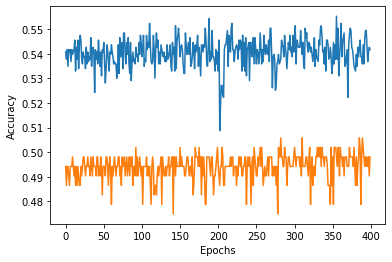

In [31]:
plt.plot(result.history['accuracy'],label='Accuracy')#bleu
plt.plot(result.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [32]:
predictions = model.predict((x_test, y_test))

In [45]:
predictions[11]

NameError: name 'predictions' is not defined

## Modèle 2

In [12]:
save = ModelCheckpoint('model_FootV2.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
result2 = model.fit(x_train, y_train,epochs=400,verbose=2,validation_data=(x_test, y_test),
                      callbacks=[save])

Train on 4576 samples, validate on 1144 samples
Epoch 1/400

Epoch 00001: val_accuracy improved from -inf to 0.30594, saving model to model_FootV2.h5
4576/4576 - 4s - loss: 1.4922 - accuracy: 0.3479 - val_loss: 1.2712 - val_accuracy: 0.3059
Epoch 2/400

Epoch 00002: val_accuracy improved from 0.30594 to 0.33916, saving model to model_FootV2.h5
4576/4576 - 1s - loss: 1.3127 - accuracy: 0.3802 - val_loss: 1.2476 - val_accuracy: 0.3392
Epoch 3/400

Epoch 00003: val_accuracy improved from 0.33916 to 0.36713, saving model to model_FootV2.h5
4576/4576 - 1s - loss: 1.2742 - accuracy: 0.3855 - val_loss: 1.1759 - val_accuracy: 0.3671
Epoch 4/400

Epoch 00004: val_accuracy improved from 0.36713 to 0.41084, saving model to model_FootV2.h5
4576/4576 - 1s - loss: 1.2504 - accuracy: 0.4003 - val_loss: 1.1307 - val_accuracy: 0.4108
Epoch 5/400

Epoch 00005: val_accuracy improved from 0.41084 to 0.41521, saving model to model_FootV2.h5
4576/4576 - 1s - loss: 1.2028 - accuracy: 0.4056 - val_loss: 1.116

Epoch 49/400

Epoch 00049: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0344 - accuracy: 0.4840 - val_loss: 1.0100 - val_accuracy: 0.5044
Epoch 50/400

Epoch 00050: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0284 - accuracy: 0.4886 - val_loss: 1.0094 - val_accuracy: 0.5061
Epoch 51/400

Epoch 00051: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0149 - accuracy: 0.4967 - val_loss: 1.0106 - val_accuracy: 0.5061
Epoch 52/400

Epoch 00052: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0240 - accuracy: 0.4910 - val_loss: 1.0103 - val_accuracy: 0.5070
Epoch 53/400

Epoch 00053: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0271 - accuracy: 0.4812 - val_loss: 1.0085 - val_accuracy: 0.5035
Epoch 54/400

Epoch 00054: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0256 - accuracy: 0.4891 - val_loss: 1.0092 - val_accuracy: 0.5070
Epoch 55/400

Epoch 00055: val_accuracy 

Epoch 101/400

Epoch 00101: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0188 - accuracy: 0.4993 - val_loss: 1.0107 - val_accuracy: 0.4991
Epoch 102/400

Epoch 00102: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0112 - accuracy: 0.5048 - val_loss: 1.0115 - val_accuracy: 0.5017
Epoch 103/400

Epoch 00103: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0137 - accuracy: 0.4974 - val_loss: 1.0111 - val_accuracy: 0.5035
Epoch 104/400

Epoch 00104: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0106 - accuracy: 0.5037 - val_loss: 1.0111 - val_accuracy: 0.4983
Epoch 105/400

Epoch 00105: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0143 - accuracy: 0.5061 - val_loss: 1.0092 - val_accuracy: 0.5052
Epoch 106/400

Epoch 00106: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0132 - accuracy: 0.5061 - val_loss: 1.0103 - val_accuracy: 0.5026
Epoch 107/400

Epoch 00107: val_ac

Epoch 152/400

Epoch 00152: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0128 - accuracy: 0.5061 - val_loss: 1.0120 - val_accuracy: 0.5044
Epoch 153/400

Epoch 00153: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0085 - accuracy: 0.5050 - val_loss: 1.0107 - val_accuracy: 0.5035
Epoch 154/400

Epoch 00154: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0130 - accuracy: 0.5042 - val_loss: 1.0111 - val_accuracy: 0.5035
Epoch 155/400

Epoch 00155: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0064 - accuracy: 0.5076 - val_loss: 1.0107 - val_accuracy: 0.5026
Epoch 156/400

Epoch 00156: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0132 - accuracy: 0.5017 - val_loss: 1.0103 - val_accuracy: 0.5017
Epoch 157/400

Epoch 00157: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0109 - accuracy: 0.5096 - val_loss: 1.0106 - val_accuracy: 0.5035
Epoch 158/400

Epoch 00158: val_ac

Epoch 203/400

Epoch 00203: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0081 - accuracy: 0.5055 - val_loss: 1.0101 - val_accuracy: 0.5017
Epoch 204/400

Epoch 00204: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0091 - accuracy: 0.5050 - val_loss: 1.0099 - val_accuracy: 0.5044
Epoch 205/400

Epoch 00205: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0079 - accuracy: 0.5105 - val_loss: 1.0116 - val_accuracy: 0.5052
Epoch 206/400

Epoch 00206: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0068 - accuracy: 0.5057 - val_loss: 1.0111 - val_accuracy: 0.5017
Epoch 207/400

Epoch 00207: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0056 - accuracy: 0.5046 - val_loss: 1.0096 - val_accuracy: 0.5061
Epoch 208/400

Epoch 00208: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0100 - accuracy: 0.5076 - val_loss: 1.0108 - val_accuracy: 0.5052
Epoch 209/400

Epoch 00209: val_ac

Epoch 254/400

Epoch 00254: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0059 - accuracy: 0.5098 - val_loss: 1.0114 - val_accuracy: 0.5026
Epoch 255/400

Epoch 00255: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0042 - accuracy: 0.5085 - val_loss: 1.0103 - val_accuracy: 0.5052
Epoch 256/400

Epoch 00256: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0072 - accuracy: 0.5048 - val_loss: 1.0104 - val_accuracy: 0.5079
Epoch 257/400

Epoch 00257: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0057 - accuracy: 0.5094 - val_loss: 1.0107 - val_accuracy: 0.5070
Epoch 258/400

Epoch 00258: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0067 - accuracy: 0.5022 - val_loss: 1.0104 - val_accuracy: 0.5035
Epoch 259/400

Epoch 00259: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0073 - accuracy: 0.5085 - val_loss: 1.0102 - val_accuracy: 0.5079
Epoch 260/400

Epoch 00260: val_ac

Epoch 305/400

Epoch 00305: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0016 - accuracy: 0.5131 - val_loss: 1.0114 - val_accuracy: 0.5052
Epoch 306/400

Epoch 00306: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0044 - accuracy: 0.5122 - val_loss: 1.0105 - val_accuracy: 0.5026
Epoch 307/400

Epoch 00307: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0040 - accuracy: 0.5079 - val_loss: 1.0116 - val_accuracy: 0.5035
Epoch 308/400

Epoch 00308: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0044 - accuracy: 0.5076 - val_loss: 1.0096 - val_accuracy: 0.5009
Epoch 309/400

Epoch 00309: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0060 - accuracy: 0.5028 - val_loss: 1.0096 - val_accuracy: 0.5026
Epoch 310/400

Epoch 00310: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0027 - accuracy: 0.5061 - val_loss: 1.0102 - val_accuracy: 0.5035
Epoch 311/400

Epoch 00311: val_ac

Epoch 356/400

Epoch 00356: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0016 - accuracy: 0.5085 - val_loss: 1.0096 - val_accuracy: 0.5026
Epoch 357/400

Epoch 00357: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0025 - accuracy: 0.5094 - val_loss: 1.0098 - val_accuracy: 0.5017
Epoch 358/400

Epoch 00358: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0040 - accuracy: 0.5072 - val_loss: 1.0098 - val_accuracy: 0.5026
Epoch 359/400

Epoch 00359: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0028 - accuracy: 0.5081 - val_loss: 1.0120 - val_accuracy: 0.4974
Epoch 360/400

Epoch 00360: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0008 - accuracy: 0.5087 - val_loss: 1.0094 - val_accuracy: 0.5026
Epoch 361/400

Epoch 00361: val_accuracy did not improve from 0.51049
4576/4576 - 1s - loss: 1.0025 - accuracy: 0.5098 - val_loss: 1.0082 - val_accuracy: 0.5026
Epoch 362/400

Epoch 00362: val_ac

### Graphique 

Text(0, 0.5, 'Accuracy')

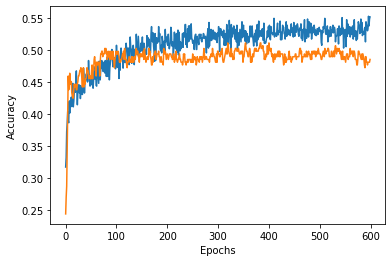

In [15]:
plt.plot(result2.history['accuracy'],label='Accuracy')#bleu
plt.plot(result2.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#### Le graphique ci dessous montre le résultat avant réduction de 10% de la quantité de données. Le problème vient donc de la quantité

Text(0, 0.5, 'Accuracy')

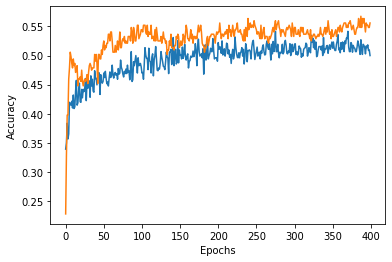

In [12]:
plt.plot(result2.history['accuracy'],label='Accuracy')#bleu
plt.plot(result2.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Test avec plus de 5000 rows

Text(0, 0.5, 'Accuracy')

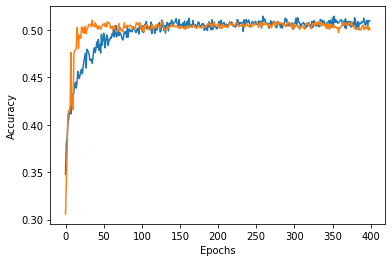

In [13]:
plt.plot(result2.history['accuracy'],label='Accuracy')#bleu
plt.plot(result2.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Après avoir testé avec 2000 époques, la limite du modèle est bien à 57%. Un besoin de donnée est requis pour aller au délà.

## Modèle 3

In [45]:
model3 = create_model3()
print(model3.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_41 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_30 (Batc (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_31 (Batc (None, 128)               512       
_________________________________________________________________
dense_43 (Dense)             (None, 256)              

In [46]:
save = ModelCheckpoint('model_FootV3.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
result3 = model3.fit(x_train, y_train,epochs=400,verbose=2,validation_data=(x_test, y_test),
                      callbacks=[save])

Train on 4576 samples, validate on 1144 samples
Epoch 1/400

Epoch 00001: val_accuracy improved from -inf to 0.34091, saving model to model_FootV3.h5
4576/4576 - 3s - loss: 1.3089 - accuracy: 0.3853 - val_loss: 1.1944 - val_accuracy: 0.3409
Epoch 2/400

Epoch 00002: val_accuracy improved from 0.34091 to 0.38899, saving model to model_FootV3.h5
4576/4576 - 1s - loss: 1.2040 - accuracy: 0.4054 - val_loss: 1.1227 - val_accuracy: 0.3890
Epoch 3/400

Epoch 00003: val_accuracy improved from 0.38899 to 0.43182, saving model to model_FootV3.h5
4576/4576 - 1s - loss: 1.1941 - accuracy: 0.4084 - val_loss: 1.0697 - val_accuracy: 0.4318
Epoch 4/400

Epoch 00004: val_accuracy did not improve from 0.43182
4576/4576 - 1s - loss: 1.1552 - accuracy: 0.4163 - val_loss: 1.0644 - val_accuracy: 0.4274
Epoch 5/400

Epoch 00005: val_accuracy improved from 0.43182 to 0.44668, saving model to model_FootV3.h5
4576/4576 - 1s - loss: 1.1298 - accuracy: 0.4235 - val_loss: 1.0481 - val_accuracy: 0.4467
Epoch 6/400


Epoch 49/400

Epoch 00049: val_accuracy did not improve from 0.52972
4576/4576 - 1s - loss: 1.0179 - accuracy: 0.5017 - val_loss: 0.9956 - val_accuracy: 0.5253
Epoch 50/400

Epoch 00050: val_accuracy did not improve from 0.52972
4576/4576 - 1s - loss: 1.0193 - accuracy: 0.4950 - val_loss: 0.9955 - val_accuracy: 0.5253
Epoch 51/400

Epoch 00051: val_accuracy did not improve from 0.52972
4576/4576 - 1s - loss: 1.0210 - accuracy: 0.4897 - val_loss: 0.9913 - val_accuracy: 0.5280
Epoch 52/400

Epoch 00052: val_accuracy did not improve from 0.52972
4576/4576 - 1s - loss: 1.0186 - accuracy: 0.5026 - val_loss: 0.9974 - val_accuracy: 0.5227
Epoch 53/400

Epoch 00053: val_accuracy did not improve from 0.52972
4576/4576 - 1s - loss: 1.0162 - accuracy: 0.4956 - val_loss: 0.9943 - val_accuracy: 0.5288
Epoch 54/400

Epoch 00054: val_accuracy improved from 0.52972 to 0.53059, saving model to model_FootV3.h5
4576/4576 - 1s - loss: 1.0191 - accuracy: 0.4972 - val_loss: 0.9900 - val_accuracy: 0.5306
Epo

Epoch 100/400

Epoch 00100: val_accuracy did not improve from 0.53322
4576/4576 - 1s - loss: 1.0141 - accuracy: 0.5048 - val_loss: 0.9917 - val_accuracy: 0.5271
Epoch 101/400

Epoch 00101: val_accuracy did not improve from 0.53322
4576/4576 - 1s - loss: 1.0121 - accuracy: 0.5052 - val_loss: 0.9930 - val_accuracy: 0.5245
Epoch 102/400

Epoch 00102: val_accuracy did not improve from 0.53322
4576/4576 - 1s - loss: 1.0094 - accuracy: 0.5002 - val_loss: 0.9921 - val_accuracy: 0.5262
Epoch 103/400

Epoch 00103: val_accuracy did not improve from 0.53322
4576/4576 - 1s - loss: 1.0102 - accuracy: 0.5050 - val_loss: 0.9909 - val_accuracy: 0.5297
Epoch 104/400

Epoch 00104: val_accuracy improved from 0.53322 to 0.53409, saving model to model_FootV3.h5
4576/4576 - 1s - loss: 1.0116 - accuracy: 0.5004 - val_loss: 0.9888 - val_accuracy: 0.5341
Epoch 105/400

Epoch 00105: val_accuracy did not improve from 0.53409
4576/4576 - 1s - loss: 1.0102 - accuracy: 0.5061 - val_loss: 0.9899 - val_accuracy: 0.52

Epoch 151/400

Epoch 00151: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0102 - accuracy: 0.4987 - val_loss: 0.9891 - val_accuracy: 0.5262
Epoch 152/400

Epoch 00152: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0102 - accuracy: 0.5042 - val_loss: 0.9922 - val_accuracy: 0.5262
Epoch 153/400

Epoch 00153: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0062 - accuracy: 0.5000 - val_loss: 0.9889 - val_accuracy: 0.5288
Epoch 154/400

Epoch 00154: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0083 - accuracy: 0.4987 - val_loss: 0.9865 - val_accuracy: 0.5306
Epoch 155/400

Epoch 00155: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0070 - accuracy: 0.5059 - val_loss: 0.9873 - val_accuracy: 0.5245
Epoch 156/400

Epoch 00156: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0071 - accuracy: 0.5017 - val_loss: 0.9846 - val_accuracy: 0.5350
Epoch 157/400

Epoch 00157: val_ac

Epoch 202/400

Epoch 00202: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0061 - accuracy: 0.5042 - val_loss: 0.9923 - val_accuracy: 0.5306
Epoch 203/400

Epoch 00203: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0076 - accuracy: 0.5015 - val_loss: 0.9885 - val_accuracy: 0.5288
Epoch 204/400

Epoch 00204: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0074 - accuracy: 0.5031 - val_loss: 0.9893 - val_accuracy: 0.5253
Epoch 205/400

Epoch 00205: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0053 - accuracy: 0.5039 - val_loss: 0.9870 - val_accuracy: 0.5227
Epoch 206/400

Epoch 00206: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0050 - accuracy: 0.5028 - val_loss: 0.9879 - val_accuracy: 0.5332
Epoch 207/400

Epoch 00207: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0058 - accuracy: 0.5066 - val_loss: 0.9856 - val_accuracy: 0.5306
Epoch 208/400

Epoch 00208: val_ac

Epoch 253/400

Epoch 00253: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0059 - accuracy: 0.5039 - val_loss: 0.9887 - val_accuracy: 0.5288
Epoch 254/400

Epoch 00254: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0072 - accuracy: 0.5048 - val_loss: 0.9895 - val_accuracy: 0.5131
Epoch 255/400

Epoch 00255: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0053 - accuracy: 0.5028 - val_loss: 0.9871 - val_accuracy: 0.5227
Epoch 256/400

Epoch 00256: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0072 - accuracy: 0.5011 - val_loss: 0.9872 - val_accuracy: 0.5245
Epoch 257/400

Epoch 00257: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0098 - accuracy: 0.5055 - val_loss: 0.9885 - val_accuracy: 0.5280
Epoch 258/400

Epoch 00258: val_accuracy did not improve from 0.53759
4576/4576 - 1s - loss: 1.0111 - accuracy: 0.4983 - val_loss: 0.9852 - val_accuracy: 0.5297
Epoch 259/400

Epoch 00259: val_ac

Epoch 304/400

Epoch 00304: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0081 - accuracy: 0.5055 - val_loss: 0.9913 - val_accuracy: 0.5219
Epoch 305/400

Epoch 00305: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0027 - accuracy: 0.5017 - val_loss: 0.9875 - val_accuracy: 0.5315
Epoch 306/400

Epoch 00306: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0036 - accuracy: 0.5103 - val_loss: 0.9872 - val_accuracy: 0.5245
Epoch 307/400

Epoch 00307: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0053 - accuracy: 0.5074 - val_loss: 0.9889 - val_accuracy: 0.5201
Epoch 308/400

Epoch 00308: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0043 - accuracy: 0.5046 - val_loss: 0.9837 - val_accuracy: 0.5315
Epoch 309/400

Epoch 00309: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0077 - accuracy: 0.5048 - val_loss: 0.9884 - val_accuracy: 0.5227
Epoch 310/400

Epoch 00310: val_ac

Epoch 355/400

Epoch 00355: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0026 - accuracy: 0.5070 - val_loss: 0.9896 - val_accuracy: 0.5210
Epoch 356/400

Epoch 00356: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0075 - accuracy: 0.5081 - val_loss: 0.9877 - val_accuracy: 0.5219
Epoch 357/400

Epoch 00357: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0062 - accuracy: 0.5057 - val_loss: 0.9897 - val_accuracy: 0.5210
Epoch 358/400

Epoch 00358: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0101 - accuracy: 0.5017 - val_loss: 0.9891 - val_accuracy: 0.5219
Epoch 359/400

Epoch 00359: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0078 - accuracy: 0.5059 - val_loss: 0.9867 - val_accuracy: 0.5288
Epoch 360/400

Epoch 00360: val_accuracy did not improve from 0.53846
4576/4576 - 1s - loss: 1.0050 - accuracy: 0.5063 - val_loss: 0.9874 - val_accuracy: 0.5236
Epoch 361/400

Epoch 00361: val_ac

Text(0, 0.5, 'Accuracy')

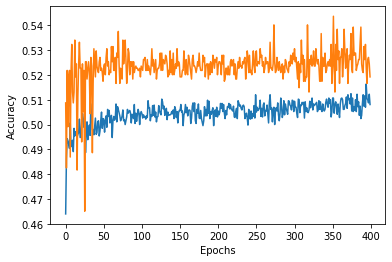

In [42]:
plt.plot(result3.history['accuracy'],label='Accuracy')#bleu
plt.plot(result3.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Test après ajout des moyennes

### Modèle 2

In [10]:
save = ModelCheckpoint('model_Foot.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
result = model.fit(x_train, y_train,epochs=400,verbose=2,validation_data=(x_test, y_test),
                      callbacks=[save])

Train on 9075 samples, validate on 2269 samples
Epoch 1/400

Epoch 00001: val_accuracy improved from -inf to 0.42045, saving model to model_Foot.h5
9075/9075 - 5s - loss: 1.3650 - accuracy: 0.3928 - val_loss: 1.1360 - val_accuracy: 0.4204
Epoch 2/400

Epoch 00002: val_accuracy improved from 0.42045 to 0.46232, saving model to model_Foot.h5
9075/9075 - 2s - loss: 1.2086 - accuracy: 0.4402 - val_loss: 1.0880 - val_accuracy: 0.4623
Epoch 3/400

Epoch 00003: val_accuracy did not improve from 0.46232
9075/9075 - 2s - loss: 1.1629 - accuracy: 0.4486 - val_loss: 1.0618 - val_accuracy: 0.4557
Epoch 4/400

Epoch 00004: val_accuracy improved from 0.46232 to 0.46628, saving model to model_Foot.h5
9075/9075 - 2s - loss: 1.1154 - accuracy: 0.4606 - val_loss: 1.0398 - val_accuracy: 0.4663
Epoch 5/400

Epoch 00005: val_accuracy improved from 0.46628 to 0.47245, saving model to model_Foot.h5
9075/9075 - 2s - loss: 1.0996 - accuracy: 0.4583 - val_loss: 1.0223 - val_accuracy: 0.4725
Epoch 6/400

Epoch 0

Epoch 50/400

Epoch 00050: val_accuracy did not improve from 0.53944
9075/9075 - 2s - loss: 0.9860 - accuracy: 0.5279 - val_loss: 0.9759 - val_accuracy: 0.5350
Epoch 51/400

Epoch 00051: val_accuracy did not improve from 0.53944
9075/9075 - 2s - loss: 0.9868 - accuracy: 0.5241 - val_loss: 0.9750 - val_accuracy: 0.5355
Epoch 52/400

Epoch 00052: val_accuracy did not improve from 0.53944
9075/9075 - 2s - loss: 0.9833 - accuracy: 0.5271 - val_loss: 0.9749 - val_accuracy: 0.5390
Epoch 53/400

Epoch 00053: val_accuracy improved from 0.53944 to 0.54121, saving model to model_Foot.h5
9075/9075 - 2s - loss: 0.9851 - accuracy: 0.5265 - val_loss: 0.9748 - val_accuracy: 0.5412
Epoch 54/400

Epoch 00054: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9832 - accuracy: 0.5272 - val_loss: 0.9740 - val_accuracy: 0.5399
Epoch 55/400

Epoch 00055: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9831 - accuracy: 0.5272 - val_loss: 0.9736 - val_accuracy: 0.5386
Epoch

Epoch 101/400

Epoch 00101: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9778 - accuracy: 0.5316 - val_loss: 0.9717 - val_accuracy: 0.5377
Epoch 102/400

Epoch 00102: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9788 - accuracy: 0.5328 - val_loss: 0.9712 - val_accuracy: 0.5381
Epoch 103/400

Epoch 00103: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9782 - accuracy: 0.5308 - val_loss: 0.9719 - val_accuracy: 0.5372
Epoch 104/400

Epoch 00104: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9791 - accuracy: 0.5304 - val_loss: 0.9727 - val_accuracy: 0.5390
Epoch 105/400

Epoch 00105: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9775 - accuracy: 0.5290 - val_loss: 0.9716 - val_accuracy: 0.5377
Epoch 106/400

Epoch 00106: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9765 - accuracy: 0.5349 - val_loss: 0.9718 - val_accuracy: 0.5381
Epoch 107/400

Epoch 00107: val_ac

Epoch 152/400

Epoch 00152: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9767 - accuracy: 0.5333 - val_loss: 0.9702 - val_accuracy: 0.5386
Epoch 153/400

Epoch 00153: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9765 - accuracy: 0.5301 - val_loss: 0.9706 - val_accuracy: 0.5386
Epoch 154/400

Epoch 00154: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9761 - accuracy: 0.5330 - val_loss: 0.9715 - val_accuracy: 0.5377
Epoch 155/400

Epoch 00155: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9756 - accuracy: 0.5320 - val_loss: 0.9704 - val_accuracy: 0.5381
Epoch 156/400

Epoch 00156: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9772 - accuracy: 0.5331 - val_loss: 0.9708 - val_accuracy: 0.5394
Epoch 157/400

Epoch 00157: val_accuracy did not improve from 0.54121
9075/9075 - 2s - loss: 0.9779 - accuracy: 0.5352 - val_loss: 0.9695 - val_accuracy: 0.5359
Epoch 158/400

Epoch 00158: val_ac

Epoch 203/400

Epoch 00203: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9746 - accuracy: 0.5363 - val_loss: 0.9708 - val_accuracy: 0.5368
Epoch 204/400

Epoch 00204: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9753 - accuracy: 0.5326 - val_loss: 0.9704 - val_accuracy: 0.5390
Epoch 205/400

Epoch 00205: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9705 - accuracy: 0.5345 - val_loss: 0.9703 - val_accuracy: 0.5416
Epoch 206/400

Epoch 00206: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9761 - accuracy: 0.5340 - val_loss: 0.9706 - val_accuracy: 0.5394
Epoch 207/400

Epoch 00207: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9767 - accuracy: 0.5337 - val_loss: 0.9699 - val_accuracy: 0.5399
Epoch 208/400

Epoch 00208: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9771 - accuracy: 0.5326 - val_loss: 0.9701 - val_accuracy: 0.5403
Epoch 209/400

Epoch 00209: val_ac

Epoch 254/400

Epoch 00254: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9744 - accuracy: 0.5360 - val_loss: 0.9695 - val_accuracy: 0.5390
Epoch 255/400

Epoch 00255: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9742 - accuracy: 0.5369 - val_loss: 0.9693 - val_accuracy: 0.5386
Epoch 256/400

Epoch 00256: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9743 - accuracy: 0.5384 - val_loss: 0.9701 - val_accuracy: 0.5377
Epoch 257/400

Epoch 00257: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9749 - accuracy: 0.5356 - val_loss: 0.9691 - val_accuracy: 0.5421
Epoch 258/400

Epoch 00258: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9745 - accuracy: 0.5356 - val_loss: 0.9700 - val_accuracy: 0.5386
Epoch 259/400

Epoch 00259: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9770 - accuracy: 0.5326 - val_loss: 0.9700 - val_accuracy: 0.5390
Epoch 260/400

Epoch 00260: val_ac

Epoch 305/400

Epoch 00305: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9744 - accuracy: 0.5336 - val_loss: 0.9694 - val_accuracy: 0.5421
Epoch 306/400

Epoch 00306: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9741 - accuracy: 0.5377 - val_loss: 0.9688 - val_accuracy: 0.5372
Epoch 307/400

Epoch 00307: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9732 - accuracy: 0.5327 - val_loss: 0.9695 - val_accuracy: 0.5394
Epoch 308/400

Epoch 00308: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9741 - accuracy: 0.5325 - val_loss: 0.9695 - val_accuracy: 0.5403
Epoch 309/400

Epoch 00309: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9729 - accuracy: 0.5362 - val_loss: 0.9694 - val_accuracy: 0.5399
Epoch 310/400

Epoch 00310: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9734 - accuracy: 0.5341 - val_loss: 0.9698 - val_accuracy: 0.5403
Epoch 311/400

Epoch 00311: val_ac

Epoch 356/400

Epoch 00356: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9726 - accuracy: 0.5353 - val_loss: 0.9688 - val_accuracy: 0.5403
Epoch 357/400

Epoch 00357: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9733 - accuracy: 0.5327 - val_loss: 0.9686 - val_accuracy: 0.5386
Epoch 358/400

Epoch 00358: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9754 - accuracy: 0.5319 - val_loss: 0.9686 - val_accuracy: 0.5412
Epoch 359/400

Epoch 00359: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9743 - accuracy: 0.5345 - val_loss: 0.9688 - val_accuracy: 0.5386
Epoch 360/400

Epoch 00360: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9725 - accuracy: 0.5373 - val_loss: 0.9686 - val_accuracy: 0.5372
Epoch 361/400

Epoch 00361: val_accuracy did not improve from 0.54253
9075/9075 - 2s - loss: 0.9747 - accuracy: 0.5349 - val_loss: 0.9690 - val_accuracy: 0.5372
Epoch 362/400

Epoch 00362: val_ac

Text(0, 0.5, 'Accuracy')

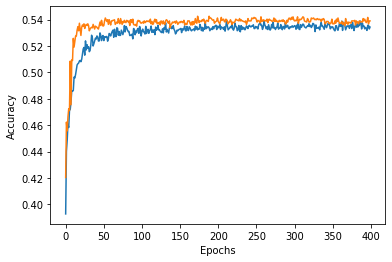

In [11]:
plt.plot(result.history['accuracy'],label='Accuracy')#bleu
plt.plot(result.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Prédictions

In [25]:
test=data_test[['date','homeTeam','awayTeam','puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]


In [26]:
unique = test.values
results = []
equal = []
victory = []
loss = []
i = 0

In [27]:
unique[1]

array(['2019-11-09', 'Rio Ave FC', 'Vitória FC', 100, 3593, 0, 1, 1, 0,
       1.4, 0.3, 0.6, 0.1, 1.3, 0.6, 0.7, 0.3], dtype=object)

In [18]:
model.load_weights("model_Foot.h5")

In [28]:
for i in unique:
    puissance_homeTeam = i[2]
    puissance_awayTeam = i[3]
    win_cons_home = i[7]
    win_cons_away = i[8]
    lose_cons_home = i[9]
    lose_cons_away= i[10]
    predictions_final = model.predict(np.array([[i[3],i[4],i[5],i[6],i[7],i[8],i[9],i[10],i[11],i[12],
                                                 i[13],i[14],i[15],i[16]]])) 
    egalite = predictions_final[0][0]*100
    victoire = predictions_final[0][1]*100
    perte = predictions_final[0][2]*100
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

In [29]:
df4 = {'date':data_test.date,'id_HomeTeam':data_test.idHomeTeam,'id_AwayTeam':data_test.idAwayTeam,
      'homeTeam':data_test.homeTeam,'AwayTeam':data_test.awayTeam,'prediction_egalité':equal,
      'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}
df4 = pd.DataFrame(df4)
df4

,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
1813,2019-11-08,5544,5533,CD Aves,Gil Vicente FC,27.167511,45.899445,26.933038,1
1814,2019-11-09,496,5620,Rio Ave FC,Vitória FC,29.638839,34.900033,35.461122,2
1815,2019-11-09,5530,1903,CD Santa Clara,Sport Lisboa e Benfica,27.251679,24.783060,47.965261,2
1816,2019-11-09,5531,583,FC Famalicão,Moreirense FC,30.947992,47.406983,21.645020,1
1817,2019-11-10,5575,5601,CS Marítimo,Portimonense SC,27.556634,45.989314,26.454055,1
...,...,...,...,...,...,...,...,...,...
1969,2020-06-23,1903,5530,Sport Lisboa e Benfica,CD Santa Clara,21.921195,60.723913,17.354894,1
1970,2020-06-23,503,810,FC Porto,Boavista FC,19.887416,68.991590,11.120993,1
1971,2020-06-24,1049,507,CD Tondela,FC Paços de Ferreira,28.041926,45.865363,26.092717,1
1972,2020-06-24,583,5531,Moreirense FC,FC Famalicão,32.548830,40.425101,27.026066,1


In [33]:
df4[150:200]

,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
1963,2020-06-18,498,1049,Sporting Clube de Portugal,CD Tondela,21.079811,70.399278,8.520913,1
1964,2020-06-19,5543,583,Vitória SC,Moreirense FC,26.495126,56.691128,16.813740,1
1965,2020-06-19,5531,5613,FC Famalicão,Sporting Clube de Braga,23.262261,28.335389,48.402348,2
1966,2020-06-21,5533,5544,Gil Vicente FC,CD Aves,26.280671,45.832565,27.886760,1
1967,2020-06-22,5601,5575,Portimonense SC,CS Marítimo,28.728434,44.609365,26.662201,1
1968,2020-06-23,5620,496,Vitória FC,Rio Ave FC,20.923477,59.221435,19.855088,1
1969,2020-06-23,1903,5530,Sport Lisboa e Benfica,CD Santa Clara,21.921195,60.723913,17.354894,1
1970,2020-06-23,503,810,FC Porto,Boavista FC,19.887416,68.991590,11.120993,1
1971,2020-06-24,1049,507,CD Tondela,FC Paços de Ferreira,28.041926,45.865363,26.092717,1
1972,2020-06-24,583,5531,Moreirense FC,FC Famalicão,32.548830,40.425101,27.026066,1


In [33]:
df4.to_csv("Predictions_reelles.csv")